## Microsoft Azure Safari Challenge Solution

The challenge is to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.


# Install the necessary libraries for this project in the requirements.txt file

In [1]:
! pip install -r requirements.txt

# Import Libraries

In [40]:
# Import the necessary libraries for this projecxt 
import os 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt, image as mpimg
from PIL import Image
import torch
import torchvision 
from torchvision import transforms, datasets
import torch.utils as utils
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F


print("All libraries are imported and ready to use.\n")

All libraries are imported and ready to use.



# Explore the image data


There are 4 classes of images to classify, which are:
['elephant', 'giraffe', 'lion', 'zebra']



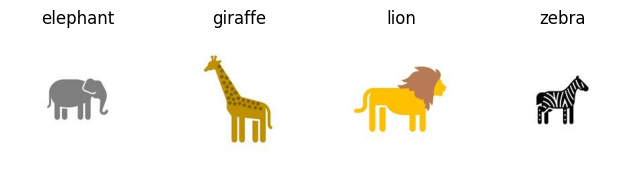

In [18]:

# The images are located in the data path.
data_path = 'safari/training'  

# Get the classes of images to be classified.
classes = os.listdir(data_path)
print(f"There are {len(classes)} classes of images to classify, which are:\n{classes}\n")

# Display the classes of images to be classified.
fig = plt.figure(figsize=(8, 10))

# Initialize the subplot index.
i = 0

for sub_directory in classes:
    i += 1
    # Get the path of the first image in the directory.
    image_path = os.listdir(os.path.join(data_path, sub_directory))[0]
    image_file = os.path.join(data_path, sub_directory, image_path)
    
    # Read the image using matplotlib.
    image = mpimg.imread(image_file)
    
    # Add a subplot for each class and display the image.
    ax = fig.add_subplot(1, len(classes), i)
    ax.axis("off")
    ax.set_title(sub_directory)
    plt.imshow(image)

# Display the images.
plt.show()

In [19]:

# Check the dimensions of the image.
for sub_directory in classes:
    
    # Get the path of the first image in the directory.
    image_path = os.listdir(os.path.join(data_path, sub_directory))[0]
    image_file = os.path.join(data_path, sub_directory, image_path)

    # Open the image.
    image = Image.open(image_file)

    # Get the width and height of the image.
    width = image.width
    height = image.height

    # Print the width and height of the image.
    print(f"The width and height of the {sub_directory.title()} image are {width} and {height} pixels respectively.")

The width and height of the Elephant image are 200 and 200 pixels respectively.
The width and height of the Giraffe image are 200 and 200 pixels respectively.
The width and height of the Lion image are 200 and 200 pixels respectively.
The width and height of the Zebra image are 200 and 200 pixels respectively.


 Calculating the mean and standard deviation (std) for normalization.

In [89]:
torch.manual_seed(2024)

# Define the transform to convert the images to tensors.
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the image dataset.
dataset = torchvision.datasets.ImageFolder(
    root=data_path,
    transform= transform
)
dataset_loader = torch.utils.data.DataLoader(dataset, batch_size=32 , shuffle=False)

def compute_mean_and_std(loader):
    mean, std = 0, 0
    total_images_count = 0 
    
    # for images, _ in loader:
        
        
        
        
        
        

# compute_mean_and_std(dataset_loader)



## Load the image data.

This section involves loading and transforming the image data. The loaders will transform the image data into *tensors*, which are the core data structure used in PyTorch, and normalize them so that the pixel values are in a scale with a mean of 0.5 and a standard deviation of 0.5.

In [21]:
# The function to load the dataset using training and validation loaders.
def load_dataset(data_path):
    """This function ingests the image data using the training and validation loaders, transforms the data, 
    and normalizes them to have a mean of 0.5 and a standard deviation of 0.5.

    Args:
        data_path (str): The directory containing the image data.
        
    Returns:
        train_loader: DataLoader for the training dataset.
        val_loader: DataLoader for the validation dataset.
    """ 
    
    # Define the transformations to be performed.
    transformations = transforms.Compose([
        # Resize the images.
        transforms.Resize((224, 224)),
        
        # Random horizontal flip with a probability of 0.5
        transforms.RandomHorizontalFlip(p=0.5),
    
        # Random rotation of the image by a given angle (degrees)
        transforms.RandomRotation(degrees=30),
    
        # Convert images to tensors.
        transforms.ToTensor(),
    
        # Normalize the pixel values (in RGB channels).
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
    
    # Load all the image dataset and apply transformations.
    full_dataset = datasets.ImageFolder(
        root=data_path,
        transform=transformations
    )
    
    # Split the data into (70%) training and (30%) validation sets.
    train_size = int(0.7 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = utils.data.random_split(full_dataset, [train_size, val_size]) 
    
    # Define a loader for the training dataset to iterate in batches of 32 images.
    train_loader = utils.data.DataLoader(
        train_dataset, 
        batch_size=40,
        num_workers=1,  
        shuffle=False
    )
    
    # Define a loader for the validation dataset to iterate in batches of 32 images.
    val_loader = utils.data.DataLoader(
        val_dataset, 
        batch_size=40,
        num_workers=1,
        shuffle=False
    )
    
    return train_loader, val_loader

# Get the training and validation dataset iteratively in batches.
train_loader, val_loader = load_dataset(data_path)
print("Data are loaded and are ready to use!")

Data are loaded and are ready to use!


Since the training dataset has been loaded, it will be used to train the Convolutional Neural Network (CNN) model. The loaded validation dataset will be used to evaluate how the model is performing in classifying the four classes of animals.

### Now, it's time to define the CNN architecture and the layers in the network.


In [23]:
# Create a CNN class.
class AnimalNet(nn.Module):
    """This class defines the architecture of the Convolutional Neural Network (CNN) using the nn module as the base or parent class."""
    
    def __init__(self, num_classes=4):
        super(AnimalNet, self).__init__()
        
        # First convolutional layer that applies 32 filters for RGB images.
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Apply max pooling with a kernel size of 2.
        self.pool = nn.MaxPool2d(kernel_size=2)
        
        # Second convolutional layer that takes 32 input channels and generates 32 outputs.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Third convolutional layer that takes 32 input channels and generates 64 outputs.
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
          
        # A dropout layer to drop 20% of the features, dropout helps to avoid overfitting.
        self.drop = nn.Dropout2d(p=0.2)
        
        # Flatten the feature tensors and feed them into the first fully connected layer.
        self.fc = nn.Linear(in_features=56 * 56 * 64, out_features=num_classes)
        
        
    def forward(self, x):
        # Use the ReLU activation function after layer 1 (convolution 1 and pool).
        x = F.relu(self.pool(self.conv1(x)))
        
        # Use the ReLU activation function after layer 2 (convolution 2 and pool).
        x = F.relu(self.pool(self.conv2(x)))
        
        # Select some features to drop after the 3rd convolution to prevent overfitting.
        x = F.relu(self.drop(self.conv3(x)))
        
        # Only drop out some features if it's in training mode.
        x = F.dropout(x, training=self.training)
        
        # Flatten the output before feeding it into the fully connected layer.
        x = x.view(-1, 56 * 56 * 64)
        
        # Feed the output to the fully connected layer.
        x = self.fc(x)
        
        # Return the log softmax tensor (output).
        return F.log_softmax(x, dim=1)
    
                      
print("CNN architecture has been defined!") 

CNN architecture has been defined!


## Training the model
Since the CNN architecture has been defined, we can now use the image data to train the network.

In [24]:
def train_model(device, model, train_loader, epoch, optimizer):
    # Set the model to training mode.
    model.train()
    train_loss = 0
    print(f"\nEpoch: {epoch}")
    
    # process the images in batches.
    for batch_index, (data, target) in enumerate(train_loader):
        # Use the device for hardware acceleration.
        data, target = data.to(device), target.to(device)
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)  
        
        # Get the loss 
        loss = loss_criteria(output, target)
        
        # Keep a running total
        train_loss += loss.item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics for every 5 batches
        if batch_index % 5 == 0:
            print(f"Training set [{batch_index * len(data)}/{len(train_loader.dataset)} ({100 * batch_index / len(train_loader):.0f}%)] Loss: {loss.item():.5f} ")
            
        # Return the aversge loss for each epoch.
        avg_loss = train_loss / (batch_index + 1)
        print(f"Average Training Loss: {avg_loss:.5f}")
        
        print("Training Completed!")
        
        return avg_loss
    
    
def validate_model(device, model, val_loader):
    # Switch the model to evaluation mode to see how the model is performing.
    model.eval()
    print("Model Validation Starts!")
    
    # Initialize the validation loss.
    val_loss = 0
    correct = 0
    
    with torch.no_grad():
        batch_count = 0
        for data, target in val_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted class for this  batch.
            output = model(data)
            
            # Calculate the loss for this batch.
            val_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy  metrics for this batch.
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target == predicted).item()
    
    # Calculate the total accuracy and average loss for each epoch.
    avg_loss = val_loss / batch_count
    print(f'Average Validation Loss: {avg_loss:.5f}, Accuracy: {correct}/{len(val_loader.dataset)} ({100 * correct / len(val_loader.dataset):.0f}%)')
    
    # Return average loss for each epoch.
    return avg_loss

# It is time to use the train function to train and the validatio function to evaluate how the model is performing.

device = "cpu"
# Check if GPU is present or avaliable as the hardware accelerator.
if (torch.cuda.is_available()):
    device = "cuda"
print(f"Training on {device}")

# Create an instance of the model class and allocate it to the device available.
model = AnimalNet(num_classes=len(classes)).to(device)

# Define the learning rate.
learning_rate = 0.001
# Use Adaptive Moment Estimation Optimization to adjust and update the model weights.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Specify the loss criteria.
loss_criteria = nn.CrossEntropyLoss()

# Initialize empty arrays to track metrics.
epoch_nums, training_loss, validation_loss,  = [], [], []

# Train over 30 epochs.
epochs = 25
for epoch in range(1, epochs +1):
    train_loss = train_model(device, model, train_loader, epoch, optimizer)
    val_loss = validate_model(device, model, val_loader)
    
    # Append the metrics to the predefined empty arrays.
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

Training on cpu

Epoch: 1
Training set [0/277 (0%)] Loss: 1.38780 
Average Training Loss: 1.38780
Training Completed!
Model Validation Starts!
Average Validation Loss: 5.65672, Accuracy: 27/119 (23%)

Epoch: 2
Training set [0/277 (0%)] Loss: 4.03290 
Average Training Loss: 4.03290
Training Completed!
Model Validation Starts!
Average Validation Loss: 4.83834, Accuracy: 29/119 (24%)

Epoch: 3
Training set [0/277 (0%)] Loss: 4.26290 
Average Training Loss: 4.26290
Training Completed!
Model Validation Starts!
Average Validation Loss: 2.10735, Accuracy: 38/119 (32%)

Epoch: 4
Training set [0/277 (0%)] Loss: 1.98647 
Average Training Loss: 1.98647
Training Completed!
Model Validation Starts!
Average Validation Loss: 1.30850, Accuracy: 34/119 (29%)

Epoch: 5
Training set [0/277 (0%)] Loss: 1.44233 
Average Training Loss: 1.44233
Training Completed!
Model Validation Starts!
Average Validation Loss: 1.18324, Accuracy: 39/119 (33%)

Epoch: 6
Training set [0/277 (0%)] Loss: 1.32308 
Average Train

# Display how the model is performing.
A graph of training loss and validation versus the number of epoch is displayed, which is to display how the model is training and how it is also performing 
and genrealizing to validation data.

Text(0.5, 1.0, 'Learning Curve')

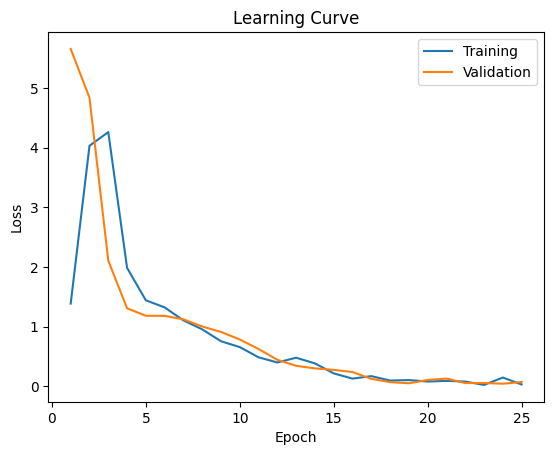

In [25]:
plt.plot(epoch_nums, training_loss, label="Training")
plt.plot(epoch_nums, validation_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Learning Curve")

# Evaluate the model performance.
Exploring model performance in more depth to see how well the model is performing and generalizing.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report 


# [0: Elephant, 1: Giraffe, 2: Lion, 3:Zebra]
# Set the model to evaluate mode.
model.eval()

actual_labels, predictions = [], []

for data, target in val_loader:
    # Get the actual labels.
    for label in target.cpu().data:
        actual_labels.append(label.item())
    # Get the predicted labels.
    for prediction in model.cpu()(data).data.numpy().argmax(1):
        predictions.append(prediction)
        

# Get the confusion metrics.
conf_matrx = confusion_matrix(actual_labels, predictions)

# Get the classification report.
class_rep = classification_report(actual_labels, predictions)
print(class_rep)
print(conf_matrx)
# # Create a figure.
# fig = plt.figure(figsize=(10, 10))
# sns.heatmap(data=conf_matrx, annot=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        27

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119

[[36  0  0  0]
 [ 0 29  0  0]
 [ 0  0 27  0]
 [ 0  0  0 27]]


# Save the trained model.
Save the trained model, so as to be loaded back for inference.

In [30]:
model_file = "model/animal_classifier.pt"
torch.save(model.state_dict(), model_file)
print(f"The Animal Classifier Model is saved as {model_file}")

The Animal Classifier Model is saved as model/animal_classifier.pt


# Use the trained model saved to make inference on new images data.
Since the model has been trained and evaluated, let's use the model to predict new classes of animal images.

elephant.jpg
giraffe.jpg
lion.jpg
zebra.jpg


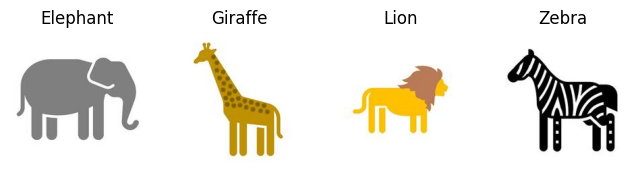

In [58]:
def load_image(image_path):
    
    # Apply transformations on the input image data.
    transformations = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    # Open the image.
    image = Image.open(image_path)
    # Apply trnaformations for preprocessing of the opened image.
    image_tensor = transformations(image)
    # Add a batch dimension.
    image_tensor = image_tensor.unsqueeze(0)
    
    # return image.to("cuda" if torch.cuda.is_available() else 'cpu')
    if torch.cuda.is_available():
        return image_tensor.to("cuda")
    
    else:
        return image_tensor.to("cpu")





def predict_image(model, image_path):
    
    # Set the model to evaluation mode.
    model.eval()
    
    # Preprocess the input image.
    image_tensor = load_image(image_path)
    
    # Predict the class of the image.
    output = model(image_tensor)
    _, label = torch.max(output, 1)
    
    return label.item()




classes = ["elephant", "giraffe", "lion", "zebra"]

# Load the model.
classifier_model = AnimalNet(num_classes=len(classes))
classifier_model.load_state_dict(torch.load(model_file))


# Show the test images with predictions.
fig = plt.figure(figsize=(8, 10))   # Create a figure.

# Initialize the subplot index.
i = 0

for image_file in os.listdir("safari/test"):
    print(image_file)
    i +=  1
    # Read the image file.
    image_path = os.path.join("safari", "test", image_file)
    img = mpimg.imread(image_path)
    
    # Get the image prediction and display the predicted class in the subpllots.
    label = predict_image(model=classifier_model, image_path=image_path)   # Get the image classes index.
    prediction = classes[label]
    
    
    # Add subplot to the pre-created figure.
    ax = fig.add_subplot(1, len(classes), i)
    ax.axis("off")
    
    ax.set_title(f"{prediction.title()}")
     
    plt.imshow(img)



